In [26]:
# Import necessay library
from __future__ import print_function

import os
import subprocess

from IPython.display import Image, display

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.externals.six import StringIO

import pandas as pd
import numpy as np

import statistics
import pydot

In [27]:
# Function to encode target into integer
def encode_target(df, target_column, encoded_target_column_name):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.
    encoded_target_column_name -- new Target column

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[encoded_target_column_name] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [28]:
def create_tree(dt, features):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    feature_names=features,
                    filled=True, rounded=True,  
                    special_characters=True)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [29]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if " + features[node] + " <= " + str(threshold[node]) + " :")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "else :")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " (count=" + str(target_count) + ")")

    recurse(left, right, threshold, features, 0, 0)

In [30]:
# Define csv file
file_csv = "2_podes.csv"

# Define class (target) and features
target_column = "KRITERIA KOTA/DESA"
feature_columns = list(range(0,11))

Data latih iterasi ke-1
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
54                     1                          3   1    0    0      0   
20                     1                          2   1    1    0      0   
46                     1                          2   1    0    0      0   
51                     1                          1   1    1    1      0   
24                     2                          7   0    0    1      1   
4                      1                          2   1    0    0      0   
55                     1                          5   1    1    0      0   
56                     1                          2   1    1    0      1   
60                     1                          1   1    1    0      0   
2                      1                          2   1    1    1      0   
19                     1                          1   0    0    0      0   
49                     1               

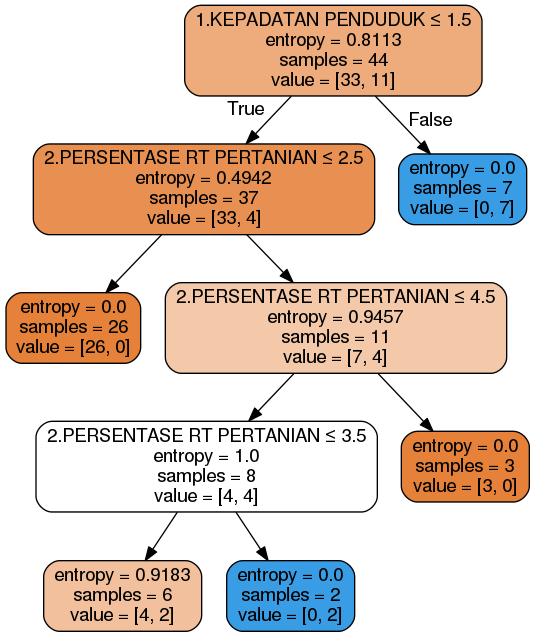



Akurasi iterasi ke-1 : 0.947368421053
---------------------------




Data latih iterasi ke-2
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
56                     1                          2   1    1    0      1   
2                      1                          2   1    1    1      0   
22                     1                          3   1    1    1      1   
1                      3                          2   1    1    1      0   
15                     1                          1   1    0    0      1   
20                     1                          2   1    1    0      0   
23                     1                          4   1    1    0      0   
27                     1                          8   1    1    1      0   
4                      1                          2   1    0    0      0   
32                     1                          2   1    1    0      1   
16                     1                   

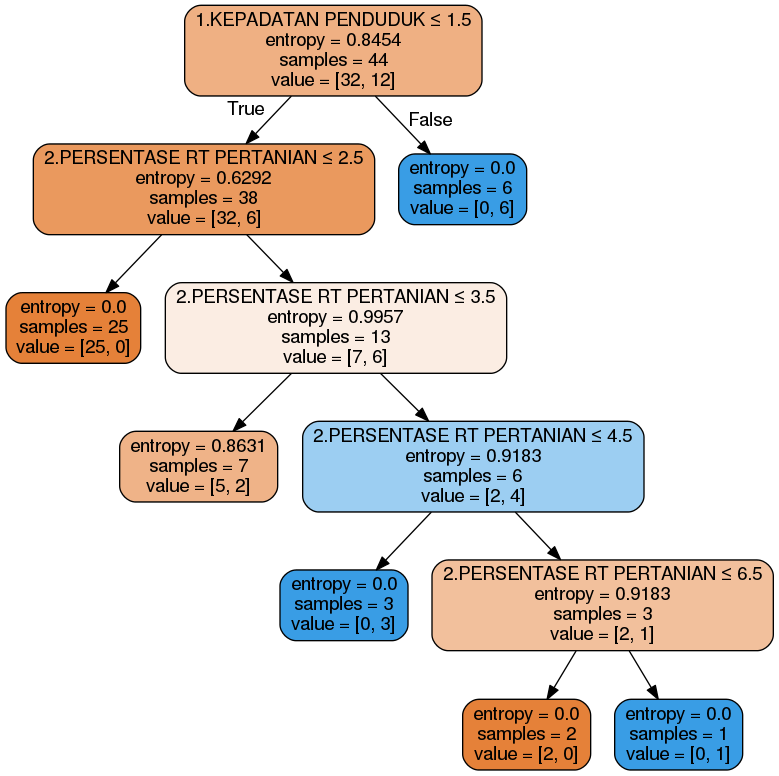



Akurasi iterasi ke-2 : 1.0
---------------------------




Data latih iterasi ke-3
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
59                     1                          3   1    1    0      0   
47                     1                          3   1    1    1      1   
20                     1                          2   1    1    0      0   
38                     1                          2   1    0    0      0   
42                     1                          2   1    0    0      0   
51                     1                          1   1    1    1      0   
37                     1                          2   1    1    1      1   
29                     1                          3   0    0    0      0   
36                     1                          5   1    1    0      0   
18                     1                          1   1    1    0      0   
27                     1                          8   

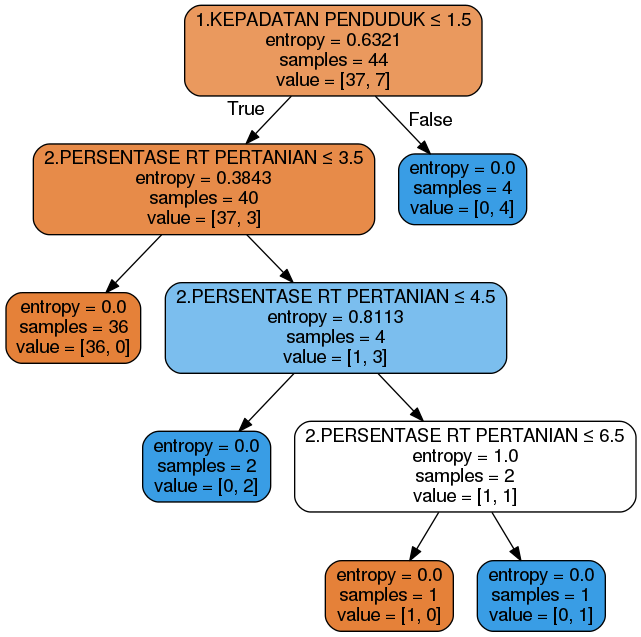



Akurasi iterasi ke-3 : 0.894736842105
---------------------------




Data latih iterasi ke-4
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
47                     1                          3   1    1    1      1   
55                     1                          5   1    1    0      0   
45                     1                          2   1    0    0      0   
8                      2                          1   1    1    1      1   
42                     1                          2   1    0    0      0   
22                     1                          3   1    1    1      1   
19                     1                          1   0    0    0      0   
53                     1                          3   1    0    0      0   
23                     1                          4   1    1    0      0   
17                     1                          1   1    1    1      0   
35                     1                   

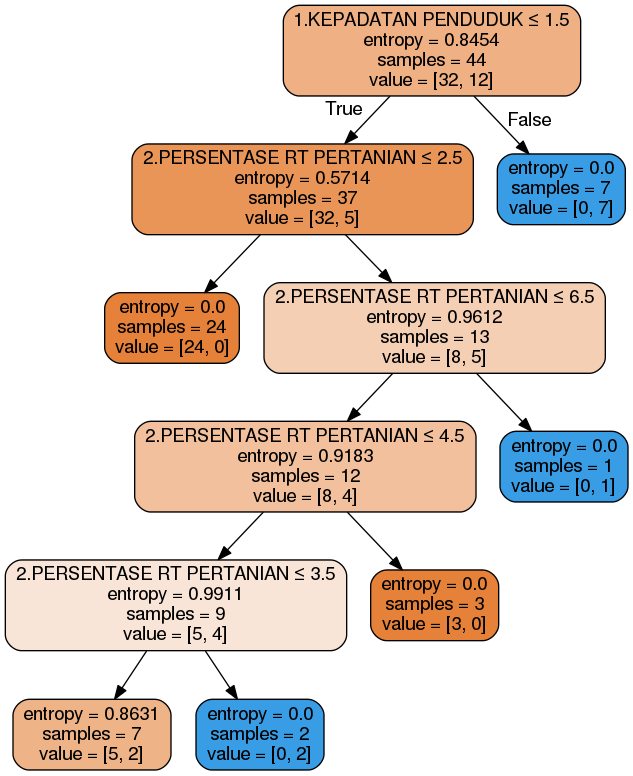



Akurasi iterasi ke-4 : 1.0
---------------------------




Data latih iterasi ke-5
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
29                     1                          3   0    0    0      0   
59                     1                          3   1    1    0      0   
53                     1                          3   1    0    0      0   
10                     2                          7   1    1    1      1   
17                     1                          1   1    1    1      0   
34                     1                          1   1    0    1      0   
47                     1                          3   1    1    1      1   
5                      1                          3   1    1    0      0   
24                     2                          7   0    0    1      1   
33                     1                          1   1    1    0      1   
55                     1                          5   

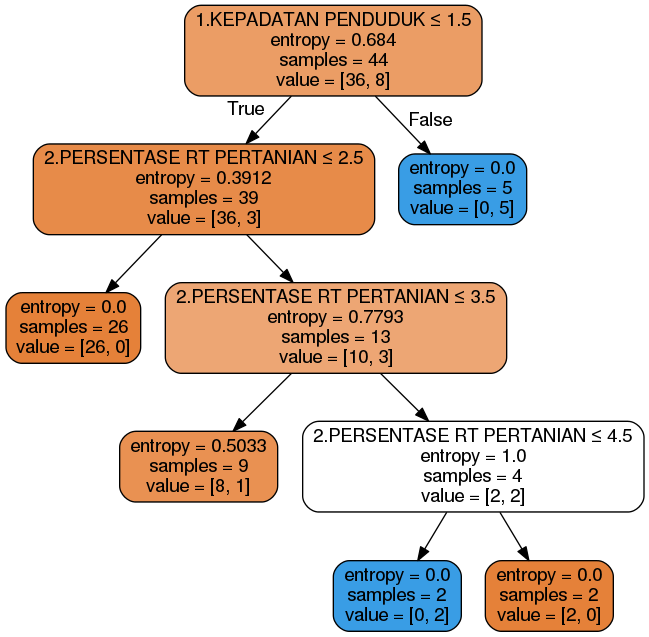



Akurasi iterasi ke-5 : 0.894736842105
---------------------------




Data latih iterasi ke-6
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
15                     1                          1   1    0    0      1   
54                     1                          3   1    0    0      0   
52                     1                          2   1    0    0      0   
37                     1                          2   1    1    1      1   
20                     1                          2   1    1    0      0   
34                     1                          1   1    0    1      0   
39                     1                          2   1    0    0      0   
55                     1                          5   1    1    0      0   
32                     1                          2   1    1    0      1   
60                     1                          1   1    1    0      0   
10                     2                   

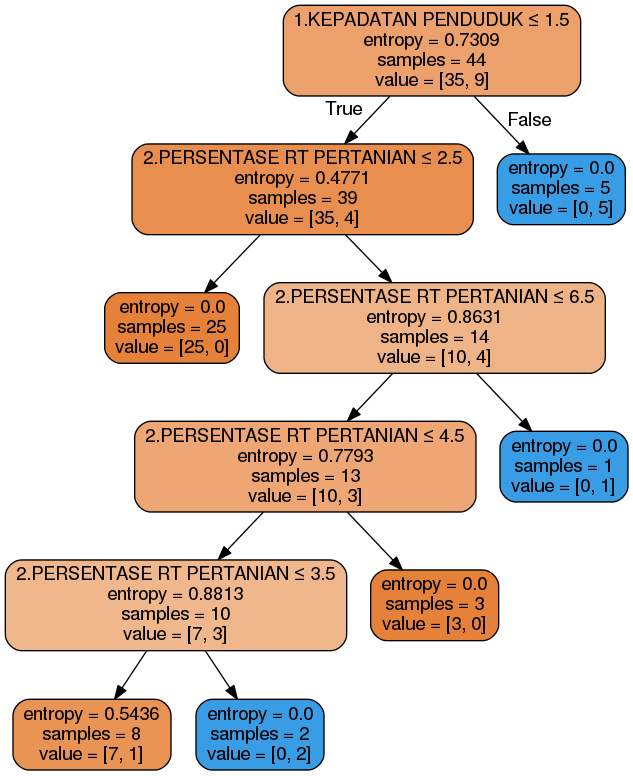



Akurasi iterasi ke-6 : 0.947368421053
---------------------------




Data latih iterasi ke-7
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
2                      1                          2   1    1    1      0   
8                      2                          1   1    1    1      1   
55                     1                          5   1    1    0      0   
9                      1                          4   1    1    0      1   
58                     1                          1   1    0    0      0   
22                     1                          3   1    1    1      1   
50                     1                          1   1    1    0      0   
13                     1                          1   1    1    0      0   
42                     1                          2   1    0    0      0   
16                     1                          3   1    0    0      1   
48                     1                   

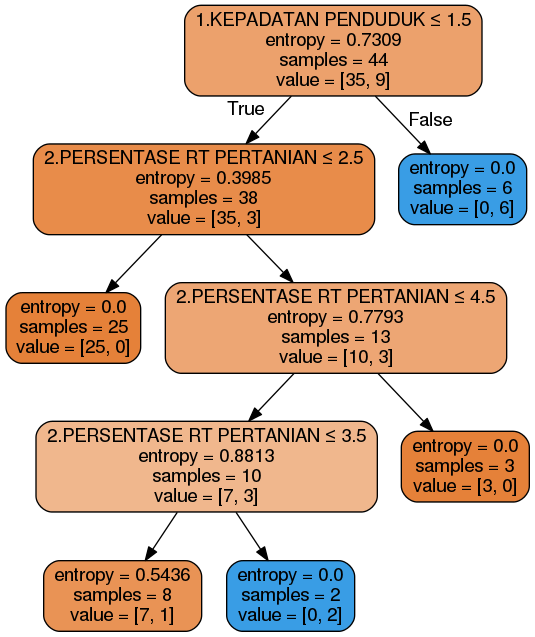



Akurasi iterasi ke-7 : 0.894736842105
---------------------------




Data latih iterasi ke-8
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
24                     2                          7   0    0    1      1   
33                     1                          1   1    1    0      1   
38                     1                          2   1    0    0      0   
56                     1                          2   1    1    0      1   
34                     1                          1   1    0    1      0   
37                     1                          2   1    1    1      1   
35                     1                          2   1    0    0      0   
49                     1                          5   1    1    0      0   
5                      1                          3   1    1    0      0   
18                     1                          1   1    1    0      0   
6                      1                   

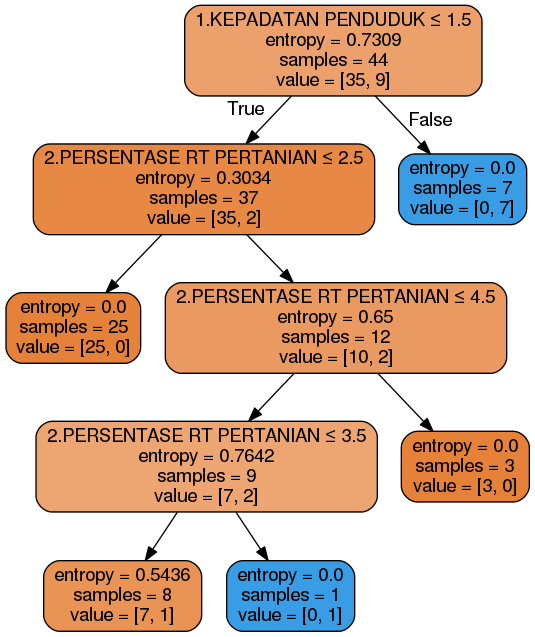



Akurasi iterasi ke-8 : 0.894736842105
---------------------------




Data latih iterasi ke-9
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
5                      1                          3   1    1    0      0   
54                     1                          3   1    0    0      0   
30                     1                          3   1    1    1      1   
7                      1                          2   1    0    0      0   
28                     2                          2   1    1    0      1   
21                     2                          5   1    0    0      1   
37                     1                          2   1    1    1      1   
43                     1                          1   1    1    1      0   
29                     1                          3   0    0    0      0   
20                     1                          2   1    1    0      0   
9                      1                   

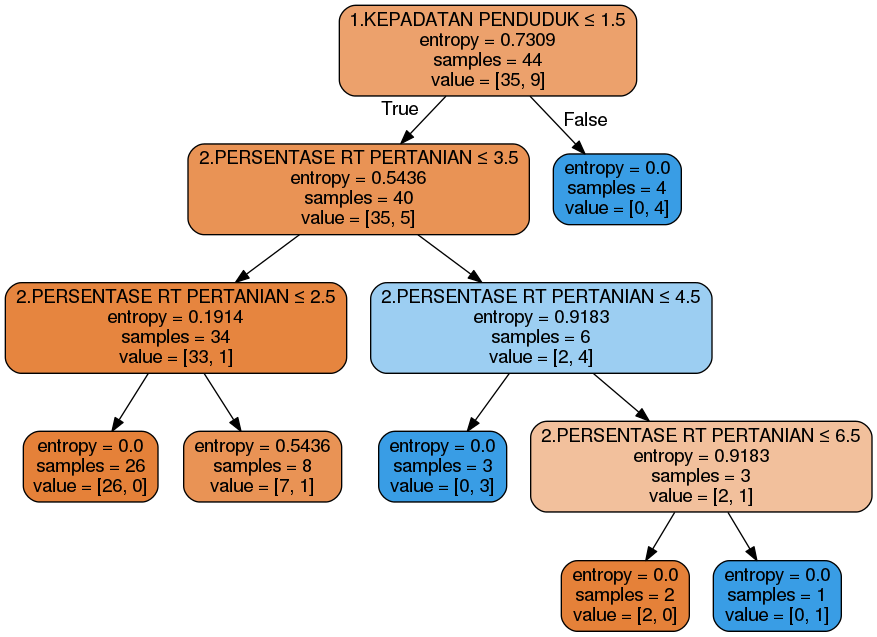



Akurasi iterasi ke-9 : 0.947368421053
---------------------------




Data latih iterasi ke-10
------------------------
    1.KEPADATAN PENDUDUK  2.PERSENTASE RT PERTANIAN  TK  SMP  SMU  PASAR  \
19                     1                          1   0    0    0      0   
43                     1                          1   1    1    1      0   
0                      1                          3   1    0    0      1   
31                     2                          7   1    1    0      1   
55                     1                          5   1    1    0      0   
48                     1                          1   1    0    0      0   
53                     1                          3   1    0    0      0   
46                     1                          2   1    0    0      0   
51                     1                          1   1    1    1      0   
16                     1                          3   1    0    0      1   
50                     1                  

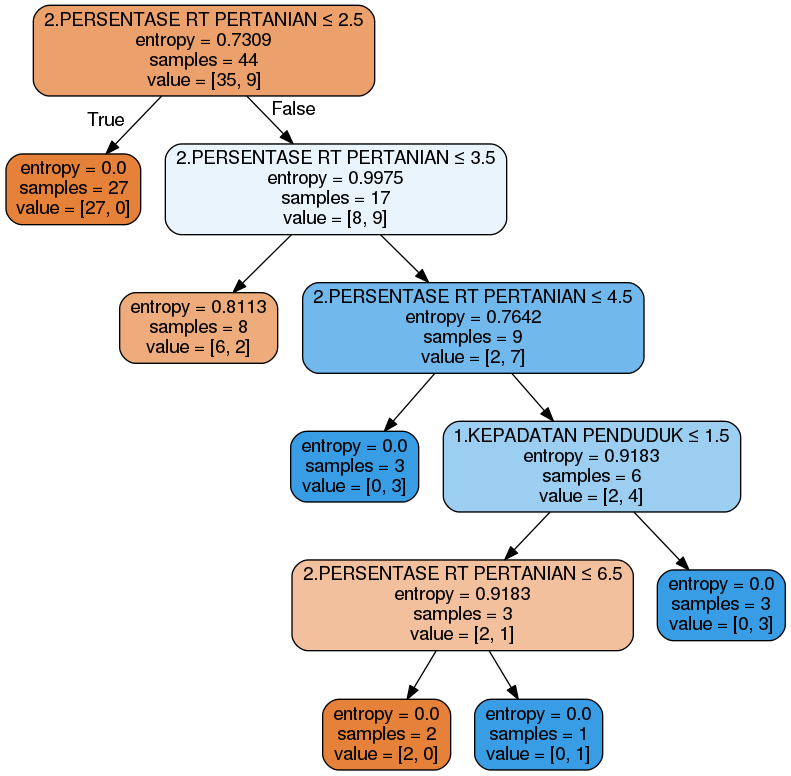



Akurasi iterasi ke-10 : 0.789473684211
---------------------------




Rata-rata akurasi dari 10 kali percobaan : 0.921052631579


In [31]:
# Read data from csv
file_csv = file_csv.replace(".csv", "")
df = pd.read_csv(file_csv + ".csv")

# Define list of accuracy to be calculated its mean
accuracies = []

# Iterate 10 times, from 1 to 11
for iter in range(1,11):
    # Encode target (class) as unique integer
    df, targets = encode_target(df, target_column, target_column + " Encoded")
    
    # Select features (predictors)
    # Column 0 = IPK
    # Column 1 = Tingkat Kemiskinan
    features = list(df.columns[[0, 1]])
    
    # Create data train and test
    # Data test size = 30% of all data
    train, test = train_test_split(df, test_size = 0.3)
    
    # Print data train and data test
    print("Data latih iterasi ke-%s" % iter)
    print("------------------------")
    print(train)
    print("\r\n")
    print("Data uji iterasi ke-%s" % iter)
    print("------------------------")
    print(test)
    print("\r\n")
    
    # Save data train and data test for each iteration for report
    train.to_csv(file_csv + "_train_" + str(iter) + ".csv")
    test.to_csv(file_csv + "_test_" + str(iter) + ".csv")
    
    # Use train data to construct model
    # Define target and features column
    y = train[target_column + " Encoded"]
    X = train[features]
    
    # Construct model
    # criterion = gini -> features are continues
    # criterion = entropy -> features are categorical
    dt = DecisionTreeClassifier(criterion="entropy", random_state=99)
    dt.fit(X, y)
    
    # Get code for model
    print("Code iterasi ke-%s" % iter)
    print("------------------------")
    get_code(dt, features, targets)
    print("\r\n")
    
    # Construct tree image
    print("Grafik Tree iterasi ke-%s" % iter)
    print("------------------------")
    tree_image = create_tree(dt, features)
    display(Image(tree_image))
    print("\r\n")
    
    # Check acuracy of the model using test data
    y = test[target_column + " Encoded"]
    X = test[features]
    accuracy = dt.score(X,y)
    accuracies.append(accuracy)
    
    # Print accuracy
    print("Akurasi iterasi ke-%s : %s" % (iter, accuracy))
    print("---------------------------")
    print("\r\n")
    
    # Print separator
    print("========================================================")
    print("\r\n")

# Print the mean of accuracies of all iterations
accuracy_mean = statistics.mean(accuracies)
print("Rata-rata akurasi dari %s kali percobaan : %s" % (len(range(1,11)), accuracy_mean))